In [84]:
# babsic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [85]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [87]:
X = df.drop(columns=['math score'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [88]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [89]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

print("We have {} numerical features {}".format(len(num_features),num_features))
print("We have {} categorical features {}".format(len(cat_features),cat_features))

We have 2 numerical features Index(['reading score', 'writing score'], dtype='object')
We have 5 categorical features Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [90]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_encode = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer([
    ('OneHotEncoder',oh_encode,cat_features),
    ('StandardScaler',num_transformer,num_features),
])

In [91]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [92]:
X = preprocessor.fit_transform(X)

In [93]:
X.shape

(1000, 14)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
def evalute_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2score = r2_score(true, predicted)
    return mae, rmse, r2score

In [100]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "KNeighbors Regressor" : KNeighborsRegressor(),
    "SVR" : SVR(),
    "DecisionTree Regressor" : DecisionTreeRegressor(),
    "RandomForest Regressor" : RandomForestRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "XGB Regressor" : XGBRegressor(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train, rmse_train, r2_score_train = evalute_model(y_train,y_train_pred)

    mae_test, rmse_test, r2_score_test = evalute_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Preformance of Training set")
    print("- Root Mean Squared Error {:.4f}".format(rmse_train))
    print("- Mean Absolute Error {:.4f}".format(mae_train))
    print("- R2 score {:.4f}".format(r2_score_train))

    print("-"*35)

    print("Model performance of Testing set")
    print("- Root Mean Squared Error {:.4f}".format(rmse_test))
    print("- Mean Absolute Error {:.4f}".format(mae_test))
    print("- R2 score {:.4f}".format(r2_score_test))
    r2_list.append(r2_score_test)

    print("="*35)
    print("\n")


Linear Regression
Model Preformance of Training set
- Root Mean Squared Error 5.3231
- Mean Absolute Error 4.2667
- R2 score 0.8743
-----------------------------------
Model performance of Testing set
- Root Mean Squared Error 5.3940
- Mean Absolute Error 4.2148
- R2 score 0.8804


Ridge
Model Preformance of Training set
- Root Mean Squared Error 5.3235
- Mean Absolute Error 4.2650
- R2 score 0.8743
-----------------------------------
Model performance of Testing set
- Root Mean Squared Error 5.3936
- Mean Absolute Error 4.2125
- R2 score 0.8805


Lasso
Model Preformance of Training set
- Root Mean Squared Error 6.5938
- Mean Absolute Error 5.2063
- R2 score 0.8071
-----------------------------------
Model performance of Testing set
- Root Mean Squared Error 6.5197
- Mean Absolute Error 5.1579
- R2 score 0.8253


KNeighbors Regressor
Model Preformance of Training set
- Root Mean Squared Error 5.5678
- Mean Absolute Error 4.4510
- R2 score 0.8625
-----------------------------------
Mode

In [103]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 score']).sort_values(by=['R2 score'],ascending=False)

,Model name,R2 score
1,Ridge,0.880451
0,Linear Regression,0.880433
6,RandomForest Regressor,0.848488
7,AdaBoost Regressor,0.846925
2,Lasso,0.825320
8,XGB Regressor,0.825046
3,KNeighbors Regressor,0.776335
5,DecisionTree Regressor,0.719937
4,SVR,0.713014


In [106]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
R2score = r2_score(y_test,y_pred)
print("Accuracy of the model {}".format(R2score))


Accuracy of the model 0.8804332983749564


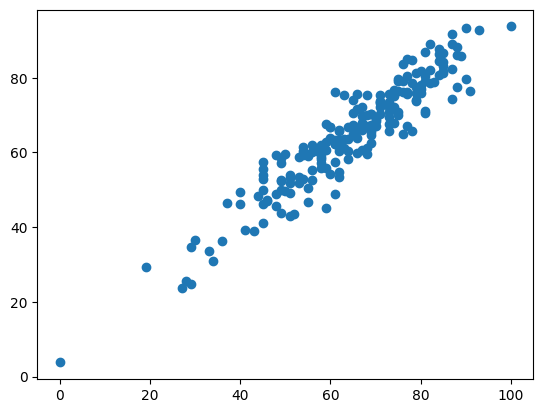

In [107]:
plt.scatter(y_test,y_pred)

In [109]:
pred_df = pd.DataFrame({
    'Actual Value' : y_test,
    'Predicted Value' : y_pred,
    'Difference' : y_test-y_pred,
})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
